<a href="https://colab.research.google.com/github/Asif-Anwar-Sajid/Machine-Learning-Assignments/blob/main/2019831045_Logistic_Regression_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = "/content/drive/MyDrive/data.txt"

data = pd.read_csv(file_path, delimiter=',', header=None)
data.columns = ['x0', 'x1', 'y']
data.head()

,x0,x1,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [12]:
X_train = data[['x0', 'x1']].values
Y_train = data['y'].values

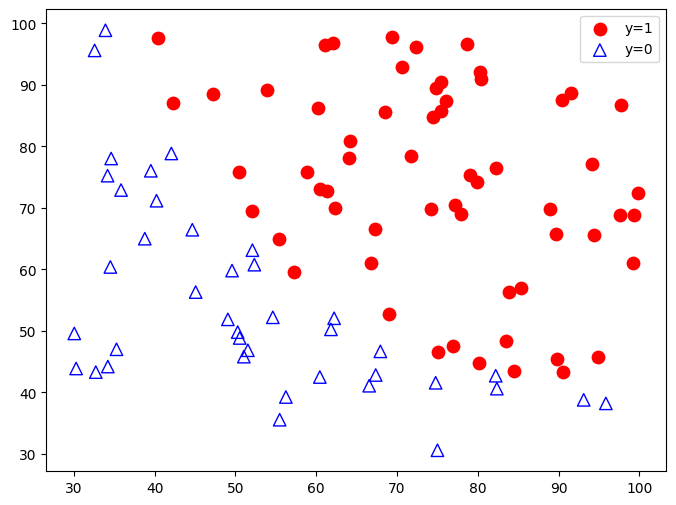

In [14]:
pos_label = "y=1"
neg_label = "y=0"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

pos = Y_train == 1
neg = Y_train == 0


ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='o', s=80, c='red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='^', s=80, label=neg_label, facecolors='none', edgecolors='blue', lw=1)

ax.legend(loc='best')

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

plt.show()

<ipython-input-18-5aef4df16db4>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], cmap='Pastel2', marker='o', label=f'Class {class_value}')


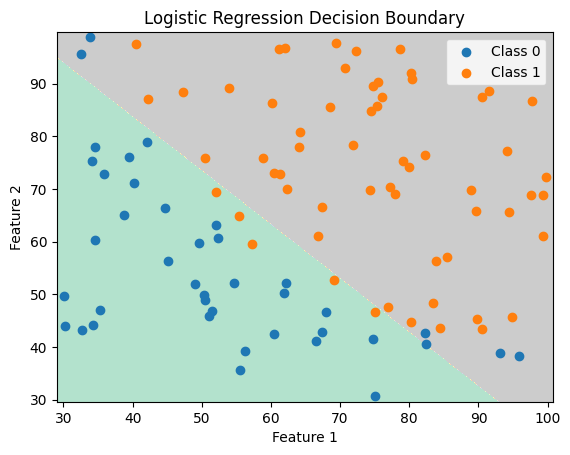

In [18]:

model = LogisticRegression()
model.fit(X_train, Y_train)

min_x1, max_x1 = X_train[:, 0].min()-1, X_train[:, 0].max()+1
min_x2, max_x2 = X_train[:, 1].min()-1, X_train[:, 1].max()+1

x1_grid = np.arange(min_x1, max_x1, 0.1)
x2_grid = np.arange(min_x2, max_x2, 0.1)

xx, yy = np.meshgrid(x1_grid, x2_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1, r2))

predictions = model.predict(grid)

zz = predictions.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Pastel2')

for class_value in range(2):
    row_ix = np.where(Y_train == class_value)
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], cmap='Pastel2', marker='o', label=f'Class {class_value}')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()